# Weather Exploratory Data Analysis

**Date:** August 04, 2024

**By** Muhammad Hassan Saboor

Data Analyst | ML & Deep Learning Enthusiast

*Student of Masters in Data Science @ FAST NUCES (LAHORE)*



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Basic Important Settings

In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [3]:
warnings.filterwarnings("ignore")

#### Importing Dataset

In [4]:
df = pd.read_csv("/kaggle/input/weather-prediction/seattle-weather.csv")

#### Exploring Data

In [5]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1461 entries, 0 to 1460

Data columns (total 6 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   date           1461 non-null   object 

 1   precipitation  1461 non-null   float64

 2   temp_max       1461 non-null   float64

 3   temp_min       1461 non-null   float64

 4   wind           1461 non-null   float64

 5   weather        1461 non-null   object 

dtypes: float64(4), object(2)

memory usage: 68.6+ KB


#### Converting into DateTime

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [8]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,day,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5,1,2012


# Exploratory Data Analysis

Precipitation Level for all Weathers

In [9]:
precipitation_table = df.groupby('weather')['precipitation'].agg(['min', 'max', 'mean']).reset_index()

In [10]:
precipitation_table.T

,0,1,2,3,4
weather,drizzle,fog,rain,snow,sun
min,0.0,0.0,0.0,0.3,0.0
max,0.0,0.0,55.9,23.9,0.0
mean,0.0,0.0,6.557878,8.553846,0.0


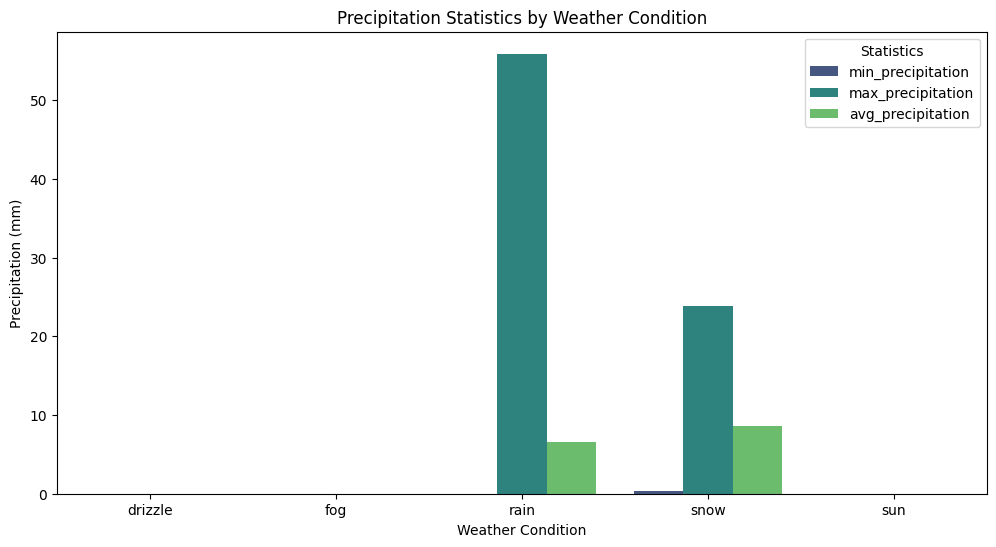

In [11]:
# Rename columns for clarity
precipitation_table.columns = ['weather', 'min_precipitation', 'max_precipitation', 'avg_precipitation']

# Plotting
plt.figure(figsize=(12, 6))

# Melt the DataFrame for seaborn
precipitation_melted = pd.melt(precipitation_table, id_vars='weather', var_name='stat', value_name='value')

# Plot using seaborn
sns.barplot(x='weather', y='value', hue='stat', data=precipitation_melted, palette='viridis')

plt.title('Precipitation Statistics by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Precipitation (mm)')
plt.legend(title='Statistics')
plt.show()

Wind Level for all the Weathers

In [12]:
wind_table = df.groupby('weather')['wind'].agg(['min', 'max', 'mean']).reset_index()

In [13]:
wind_table.T

,0,1,2,3,4
weather,drizzle,fog,rain,snow,sun
min,0.6,0.8,0.5,1.6,0.4
max,4.7,6.6,9.5,7.0,7.7
mean,2.367925,2.481188,3.669891,4.411538,2.956406


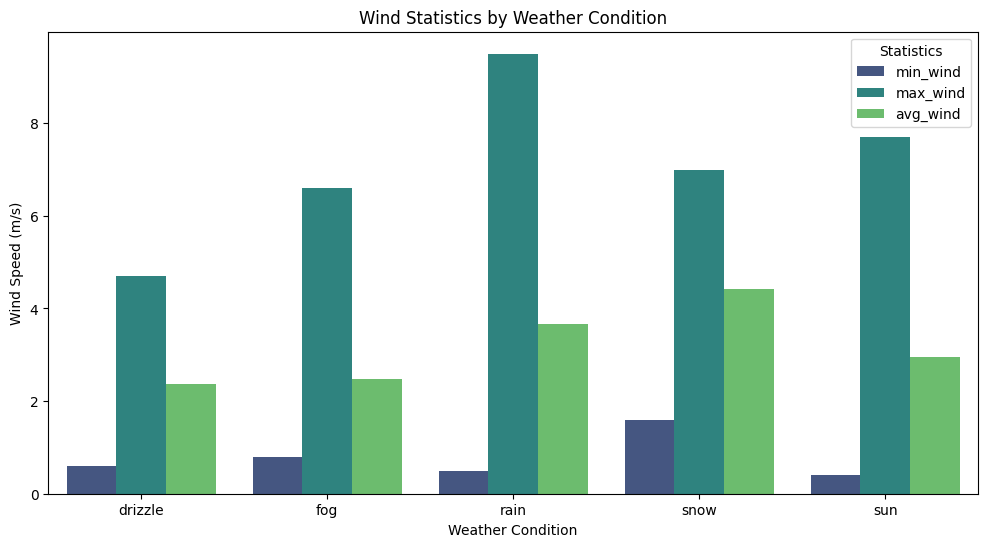

In [14]:
# Rename columns for clarity
wind_table.columns = ['weather', 'min_wind', 'max_wind', 'avg_wind']

# Plotting
plt.figure(figsize=(12, 6))

# Melt the DataFrame for seaborn
wind_melted = pd.melt(wind_table, id_vars='weather', var_name='stat', value_name='value')

# Plot using seaborn with a palette suitable for dark themes
sns.barplot(x='weather', y='value', hue='stat', data=wind_melted, palette='viridis')

plt.title('Wind Statistics by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Wind Speed (m/s)')
plt.legend(title='Statistics')
plt.show()

Max_Temperature Level for all the Weathers

In [15]:
temp_max_table = df.groupby('weather')['temp_max'].agg(['min', 'max', 'mean']).reset_index()

In [16]:
temp_max_table.T

,0,1,2,3,4
weather,drizzle,fog,rain,snow,sun
min,1.1,1.7,3.9,-1.1,-1.6
max,31.7,30.6,35.6,11.1,35.0
mean,15.926415,16.757426,13.454602,5.573077,19.861875


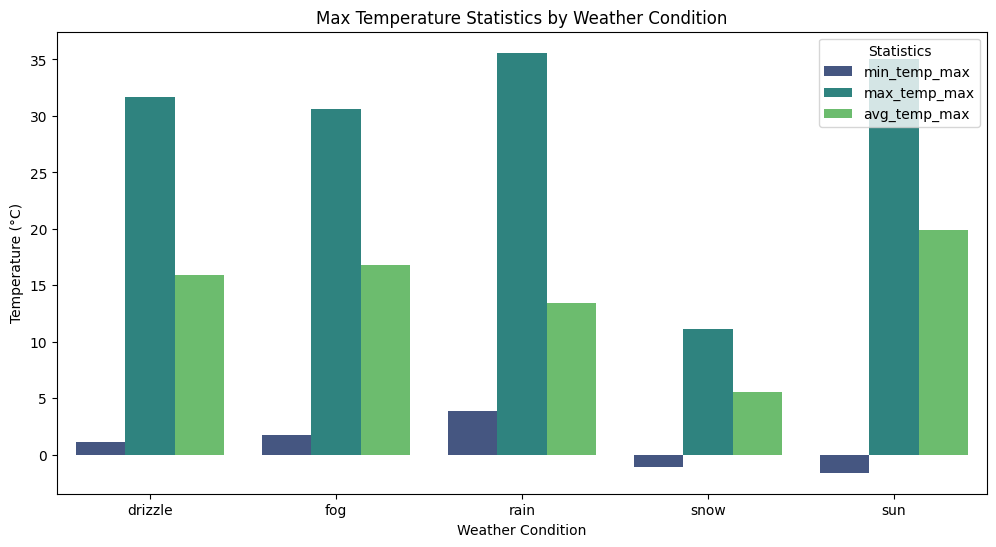

In [17]:
# Rename columns for clarity
temp_max_table.columns = ['weather', 'min_temp_max', 'max_temp_max', 'avg_temp_max']

# Plotting
plt.figure(figsize=(12, 6))

# Melt the DataFrame for seaborn
temp_max_melted = pd.melt(temp_max_table, id_vars='weather', var_name='stat', value_name='value')

# Plot using seaborn with a palette suitable for dark themes
sns.barplot(x='weather', y='value', hue='stat', data=temp_max_melted, palette='viridis')

plt.title('Max Temperature Statistics by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature (°C)')
plt.legend(title='Statistics')
plt.show()

Min_Temperature Level for all the Weathers

In [18]:
temp_min_table = df.groupby('weather')['temp_min'].agg(['min', 'max', 'mean']).reset_index()

In [19]:
temp_min_table.T

,0,1,2,3,4
weather,drizzle,fog,rain,snow,sun
min,-3.9,-3.2,-3.8,-4.3,-7.1
max,16.1,17.8,18.3,5.6,18.3
mean,7.111321,7.979208,7.588768,0.146154,9.34375


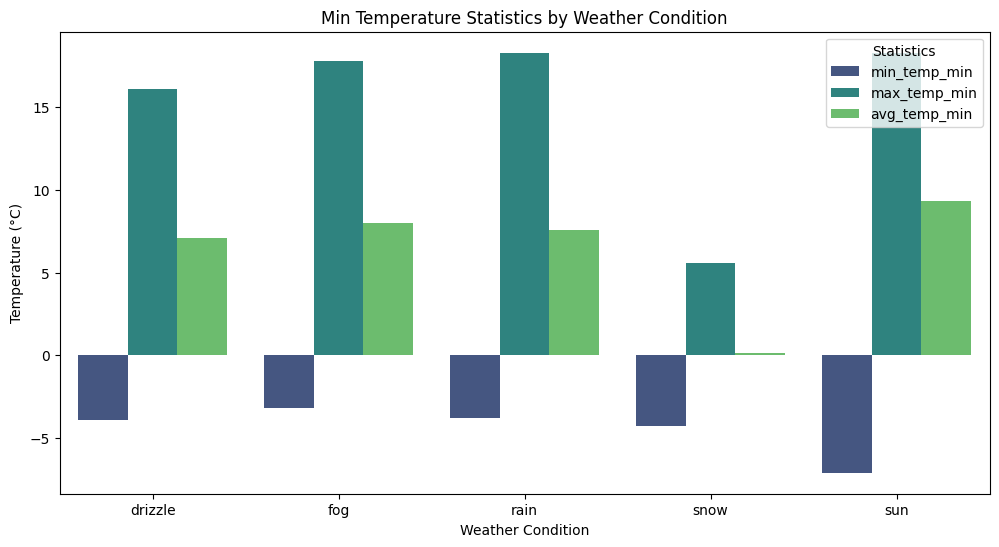

In [20]:
# Rename columns for clarity
temp_min_table.columns = ['weather', 'min_temp_min', 'max_temp_min', 'avg_temp_min']

# Plotting
plt.figure(figsize=(12, 6))

# Melt the DataFrame for seaborn
temp_min_melted = pd.melt(temp_min_table, id_vars='weather', var_name='stat', value_name='value')

# Plot using seaborn with a palette suitable for dark themes
sns.barplot(x='weather', y='value', hue='stat', data=temp_min_melted, palette='viridis')

plt.title('Min Temperature Statistics by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Temperature (°C)')
plt.legend(title='Statistics')
plt.show()

Precipitation Level for all the Weathers in different Years

In [21]:
precipitation_table_time_wise = df.groupby(['weather','year'])['precipitation'].agg(['min', 'max', 'mean']).reset_index()

In [22]:
precipitation_table_time_wise.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
weather,drizzle,drizzle,drizzle,fog,fog,fog,fog,rain,rain,rain,rain,snow,snow,snow,sun,sun,sun,sun
year,2012,2013,2015,2012,2013,2014,2015,2012,2013,2014,2015,2012,2013,2014,2012,2013,2014,2015
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,0.5,0.3,3.6,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.1,43.4,46.7,55.9,23.9,8.1,5.1,0.0,0.0,0.0,0.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.373298,5.151899,8.270946,7.911111,9.509524,4.666667,4.35,0.0,0.0,0.0,0.0


<Figure size 1400x1000 with 0 Axes>

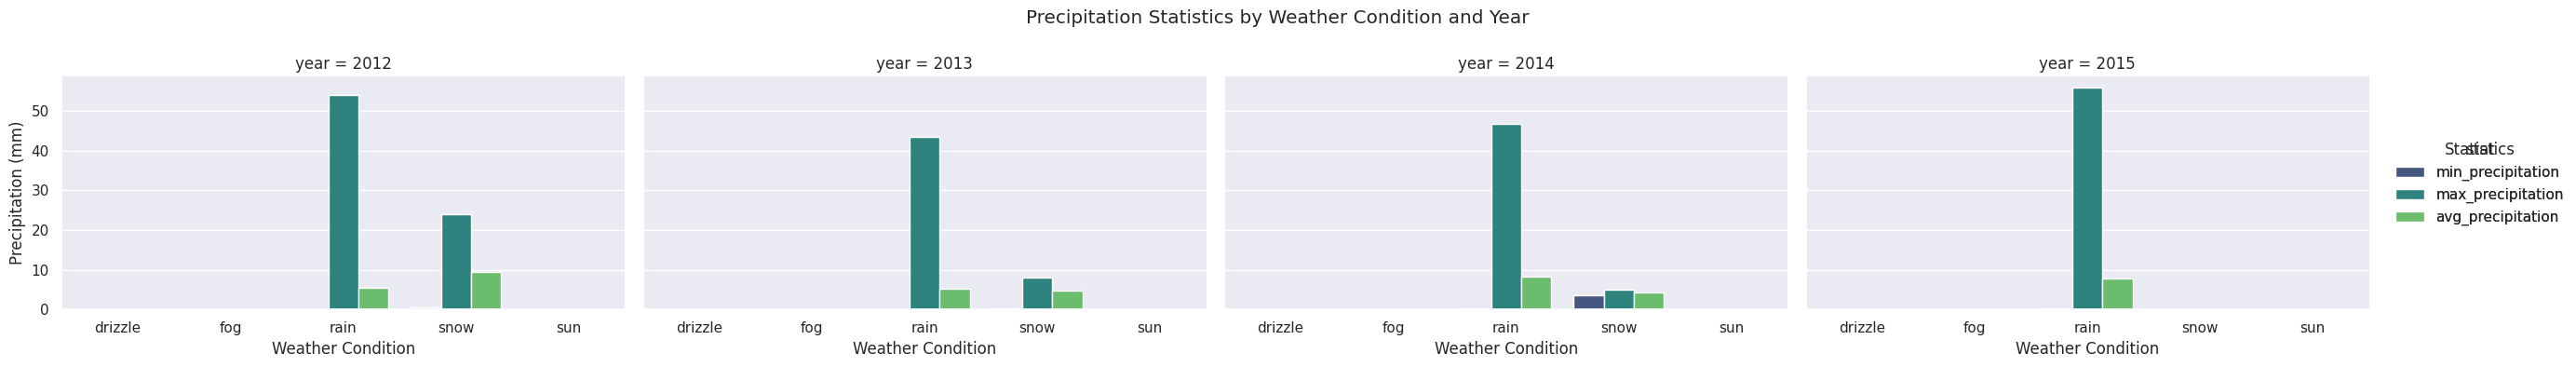

In [23]:
# Rename columns for clarity
precipitation_table_time_wise.columns = ['weather', 'year', 'min_precipitation', 'max_precipitation', 'avg_precipitation']

# Set the style for the plot
sns.set(style="darkgrid")

# Plotting
plt.figure(figsize=(14, 10))

# Melt the DataFrame for seaborn
precipitation_melted = pd.melt(precipitation_table_time_wise, id_vars=['weather', 'year'], var_name='stat', value_name='value')

# Plot using seaborn with a palette suitable for dark themes
g = sns.catplot(x='weather', y='value', hue='stat', col='year', data=precipitation_melted, kind='bar', palette='viridis', height=4, aspect=1.5)

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Precipitation Statistics by Weather Condition and Year')
g.set_axis_labels('Weather Condition', 'Precipitation (mm)')
g.add_legend(title='Statistics')

plt.show()

Wind Level for all the Weathers in different Years

In [24]:
wind_table_time_wise = df.groupby(['weather','year'])['wind'].agg(['min', 'max', 'mean']).reset_index()

In [25]:
wind_table_time_wise.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
weather,drizzle,drizzle,drizzle,fog,fog,fog,fog,rain,rain,rain,rain,snow,snow,snow,sun,sun,sun,sun
year,2012,2013,2015,2012,2013,2014,2015,2012,2013,2014,2015,2012,2013,2014,2012,2013,2014,2015
min,1.3,0.6,1.8,1.4,0.9,0.8,0.8,1.0,0.9,0.8,0.5,1.6,2.1,4.6,1.3,0.4,0.6,1.0
max,4.7,4.4,3.5,3.8,3.4,6.5,6.6,9.5,8.8,8.8,8.0,7.0,4.9,5.3,7.3,6.5,7.7,6.5
mean,2.512903,2.0,2.514286,2.42,2.1125,2.767857,2.446154,3.625131,3.573418,3.883784,3.615278,4.480952,3.566667,4.95,3.120339,2.668786,3.071123,3.011728


<Figure size 1400x1000 with 0 Axes>

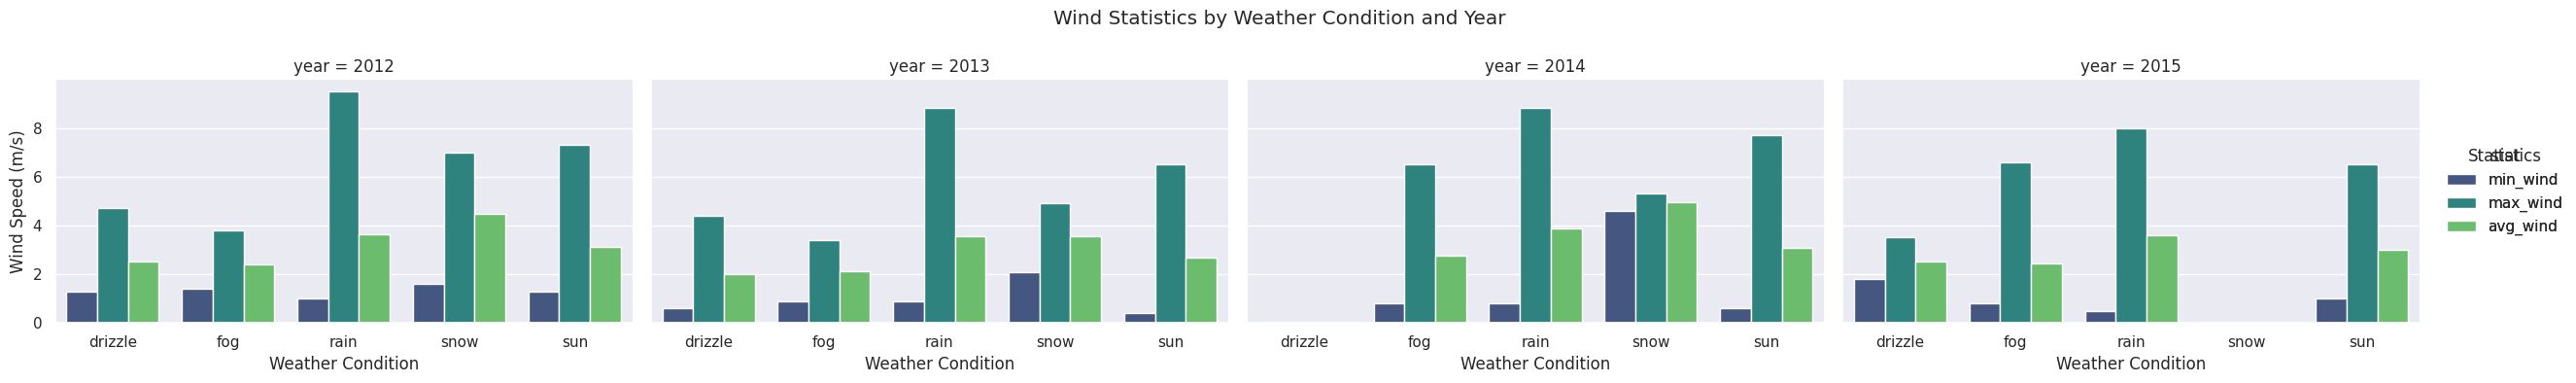

In [26]:
# Rename columns for clarity
wind_table_time_wise.columns = ['weather', 'year', 'min_wind', 'max_wind', 'avg_wind']

# Set the style for the plot
sns.set(style="darkgrid")

# Plotting
plt.figure(figsize=(14, 10))

# Melt the DataFrame for seaborn
wind_melted = pd.melt(wind_table_time_wise, id_vars=['weather', 'year'], var_name='stat', value_name='value')

# Plot using seaborn with a palette suitable for dark themes
g = sns.catplot(x='weather', y='value', hue='stat', col='year', data=wind_melted, kind='bar', palette='viridis', height=4, aspect=1.5)

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Wind Statistics by Weather Condition and Year')
g.set_axis_labels('Weather Condition', 'Wind Speed (m/s)')
g.add_legend(title='Statistics')

plt.show()

Max_Temperature Level for all the Weathers in different Years

In [27]:
temp_max_table_time_wise = df.groupby(['weather','year'])['temp_max'].agg(['min', 'max', 'mean']).reset_index()

In [28]:
temp_max_table_time_wise.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
weather,drizzle,drizzle,drizzle,fog,fog,fog,fog,rain,rain,rain,rain,snow,snow,snow,sun,sun,sun,sun
year,2012,2013,2015,2012,2013,2014,2015,2012,2013,2014,2015,2012,2013,2014,2012,2013,2014,2015
min,3.3,1.1,18.3,9.4,11.7,5.6,1.7,4.4,5.6,3.9,4.4,-1.1,3.3,4.4,5.0,0.0,-1.6,4.4
max,25.6,20.0,31.7,27.8,28.9,28.9,30.6,28.3,27.2,35.6,28.3,11.1,10.0,5.6,34.4,33.9,34.4,35.0
mean,17.374194,7.44,27.7,21.1,19.3875,17.846429,14.944231,12.80733,13.625316,14.207432,13.352083,5.395238,7.2,5.0,20.234746,18.874566,19.203743,21.404321


<Figure size 1400x1000 with 0 Axes>

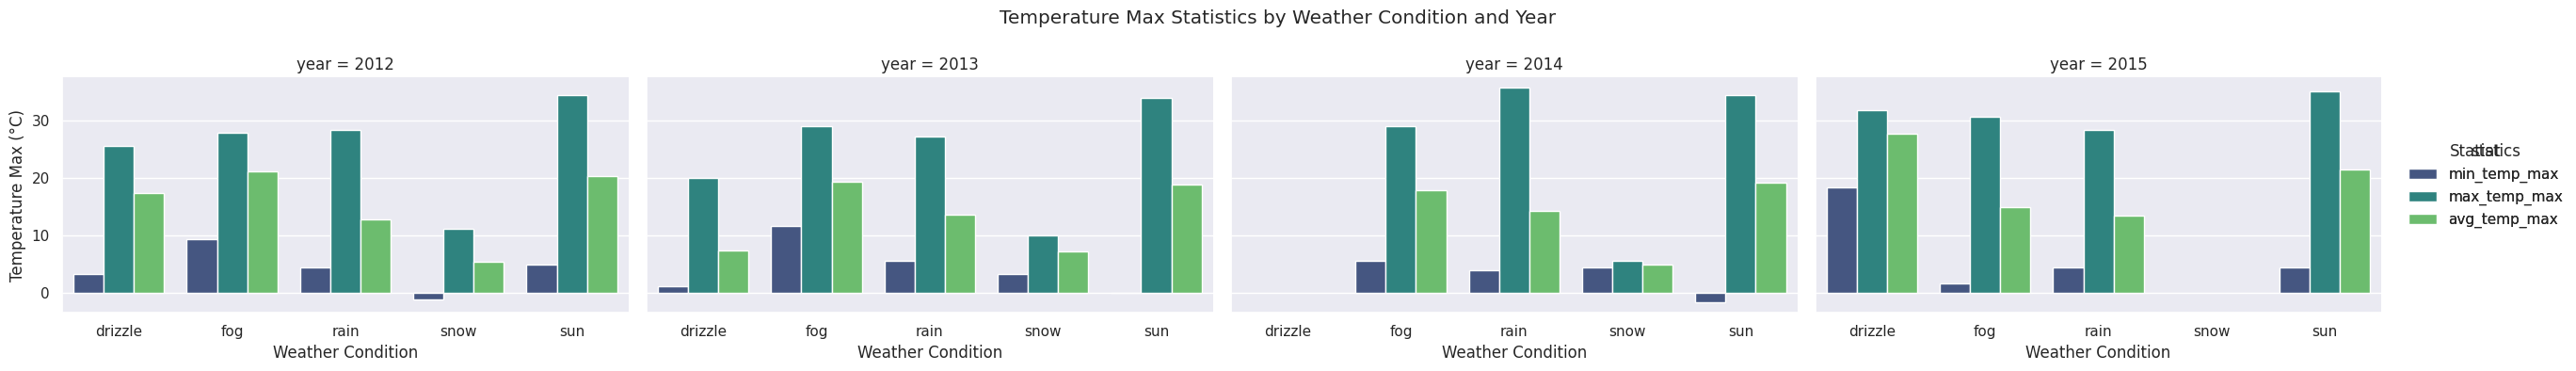

In [29]:
# Rename columns for clarity
temp_max_table_time_wise.columns = ['weather', 'year', 'min_temp_max', 'max_temp_max', 'avg_temp_max']

# Set the style for the plot
sns.set(style="darkgrid")

# Plotting
plt.figure(figsize=(14, 10))

# Melt the DataFrame for seaborn
temp_max_melted = pd.melt(temp_max_table_time_wise, id_vars=['weather', 'year'], var_name='stat', value_name='value')

# Plot using seaborn with a palette suitable for dark themes
g = sns.catplot(x='weather', y='value', hue='stat', col='year', data=temp_max_melted, kind='bar', palette='viridis', height=4, aspect=1.5)

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Temperature Max Statistics by Weather Condition and Year')
g.set_axis_labels('Weather Condition', 'Temperature Max (°C)')
g.add_legend(title='Statistics')

plt.show()

Min_Temperature Level for all the Weathers in different Years

In [30]:
temp_min_table_time_wise = df.groupby(['weather','year'])['temp_min'].agg(['min', 'max', 'mean']).reset_index()

In [31]:
temp_min_table_time_wise.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
weather,drizzle,drizzle,drizzle,fog,fog,fog,fog,rain,rain,rain,rain,snow,snow,snow,sun,sun,sun,sun
year,2012,2013,2015,2012,2013,2014,2015,2012,2013,2014,2015,2012,2013,2014,2012,2013,2014,2015
min,-2.2,-3.9,10.0,1.7,0.6,-3.2,-2.1,-1.7,-1.7,-0.5,-3.8,-3.3,-0.6,-4.3,-2.8,-7.1,-6.0,-3.2
max,15.0,5.6,16.1,13.3,16.1,17.8,15.6,15.6,18.3,17.8,18.3,5.6,2.2,-0.5,18.3,18.3,17.8,17.8
mean,8.667742,0.66,14.042857,9.34,9.89375,8.678571,6.882692,6.764398,7.907595,8.287162,7.614583,0.304762,0.733333,-2.4,8.933898,8.996532,9.075401,10.32284


<Figure size 1400x1000 with 0 Axes>

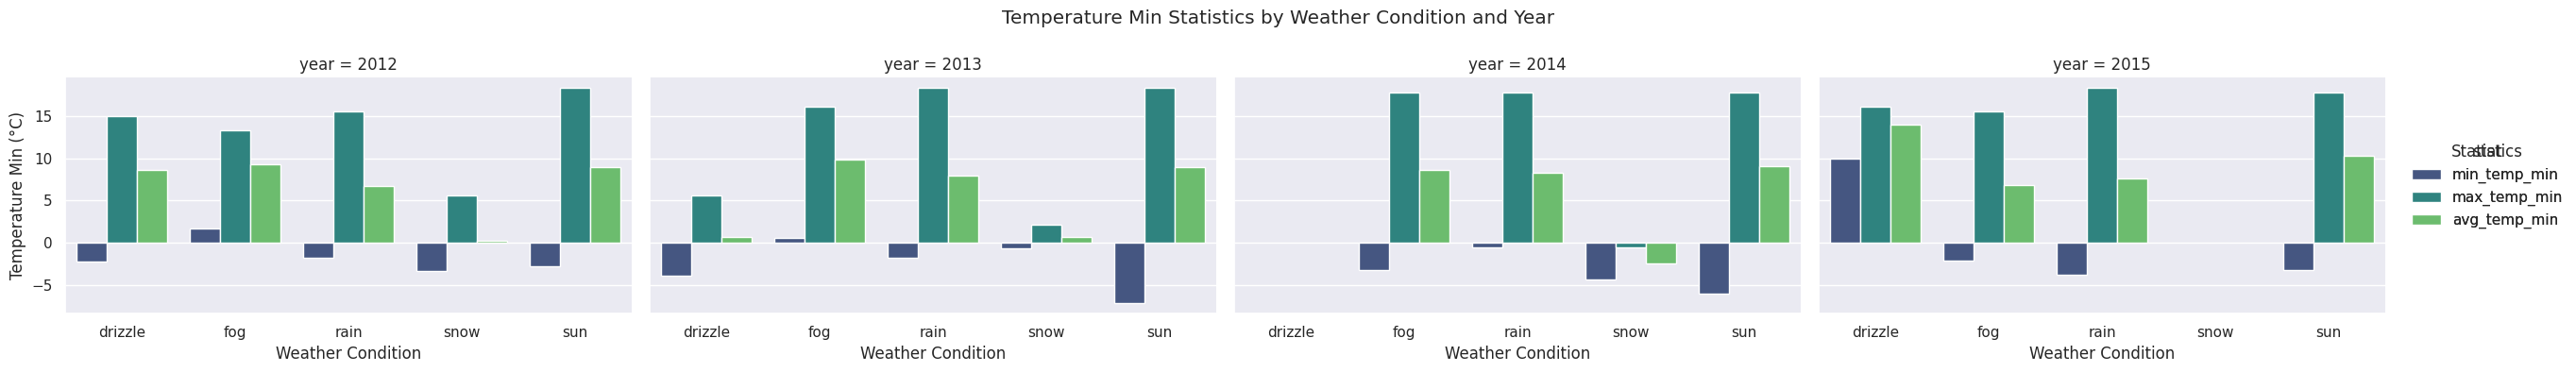

In [32]:
# Rename columns for clarity
temp_min_table_time_wise.columns = ['weather', 'year', 'min_temp_min', 'max_temp_min', 'avg_temp_min']

# Set the style for the plot
sns.set(style="darkgrid")

# Plotting
plt.figure(figsize=(14, 10))

# Melt the DataFrame for seaborn
temp_min_melted = pd.melt(temp_min_table_time_wise, id_vars=['weather', 'year'], var_name='stat', value_name='value')

# Plot using seaborn with a palette suitable for dark themes
g = sns.catplot(x='weather', y='value', hue='stat', col='year', data=temp_min_melted, kind='bar', palette='viridis', height=4, aspect=1.5)

g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Temperature Min Statistics by Weather Condition and Year')
g.set_axis_labels('Weather Condition', 'Temperature Min (°C)')
g.add_legend(title='Statistics')

plt.show()